In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [2]:
import tensorflow as tf


In [3]:
# ResNet50
 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input
 
from keras.preprocessing import image

 
img_width, img_height = 224, 224
 
model_pretrained = ResNet50(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [46]:
img_path = r'C:\Users\Mohammed Riyaz\OneDrive - TestingXperts Private Limited\Pretrained_Model\Images\yumna.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
 

In [47]:
#predict the result
cnn_feature = model_pretrained.predict(img_data,verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]

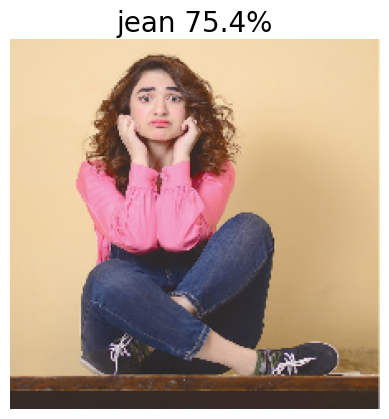

Predicted: [('n03594734', 'jean', 0.7542546), ('n04254777', 'sock', 0.039042853), ('n04493381', 'tub', 0.03245214)]


('n03594734', 'jean', 0.7542546)

In [48]:
plt.imshow(img)
 
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()
 
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(cnn_feature, top=3)[0])
 
label

<>:13: SyntaxWarning: invalid escape sequence '\M'
<>:13: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Mohammed Riyaz\AppData\Local\Temp\ipykernel_10076\109684415.py:13: SyntaxWarning: invalid escape sequence '\M'
  folder_path = 'C:/Users\Mohammed Riyaz/OneDrive - TestingXperts Private Limited/Pretrained_Model/Images/'


['bus.jpg', 'cat.jpg', 'download.jpg', 'fish.jpg', 'galaxy.jpg', 'hockey.jpg', 'monitor.jpg', 'papaya.jpg', 'phone.jpg', 'school.jpg', 'SRK.jpg', 'yumna.jpg']


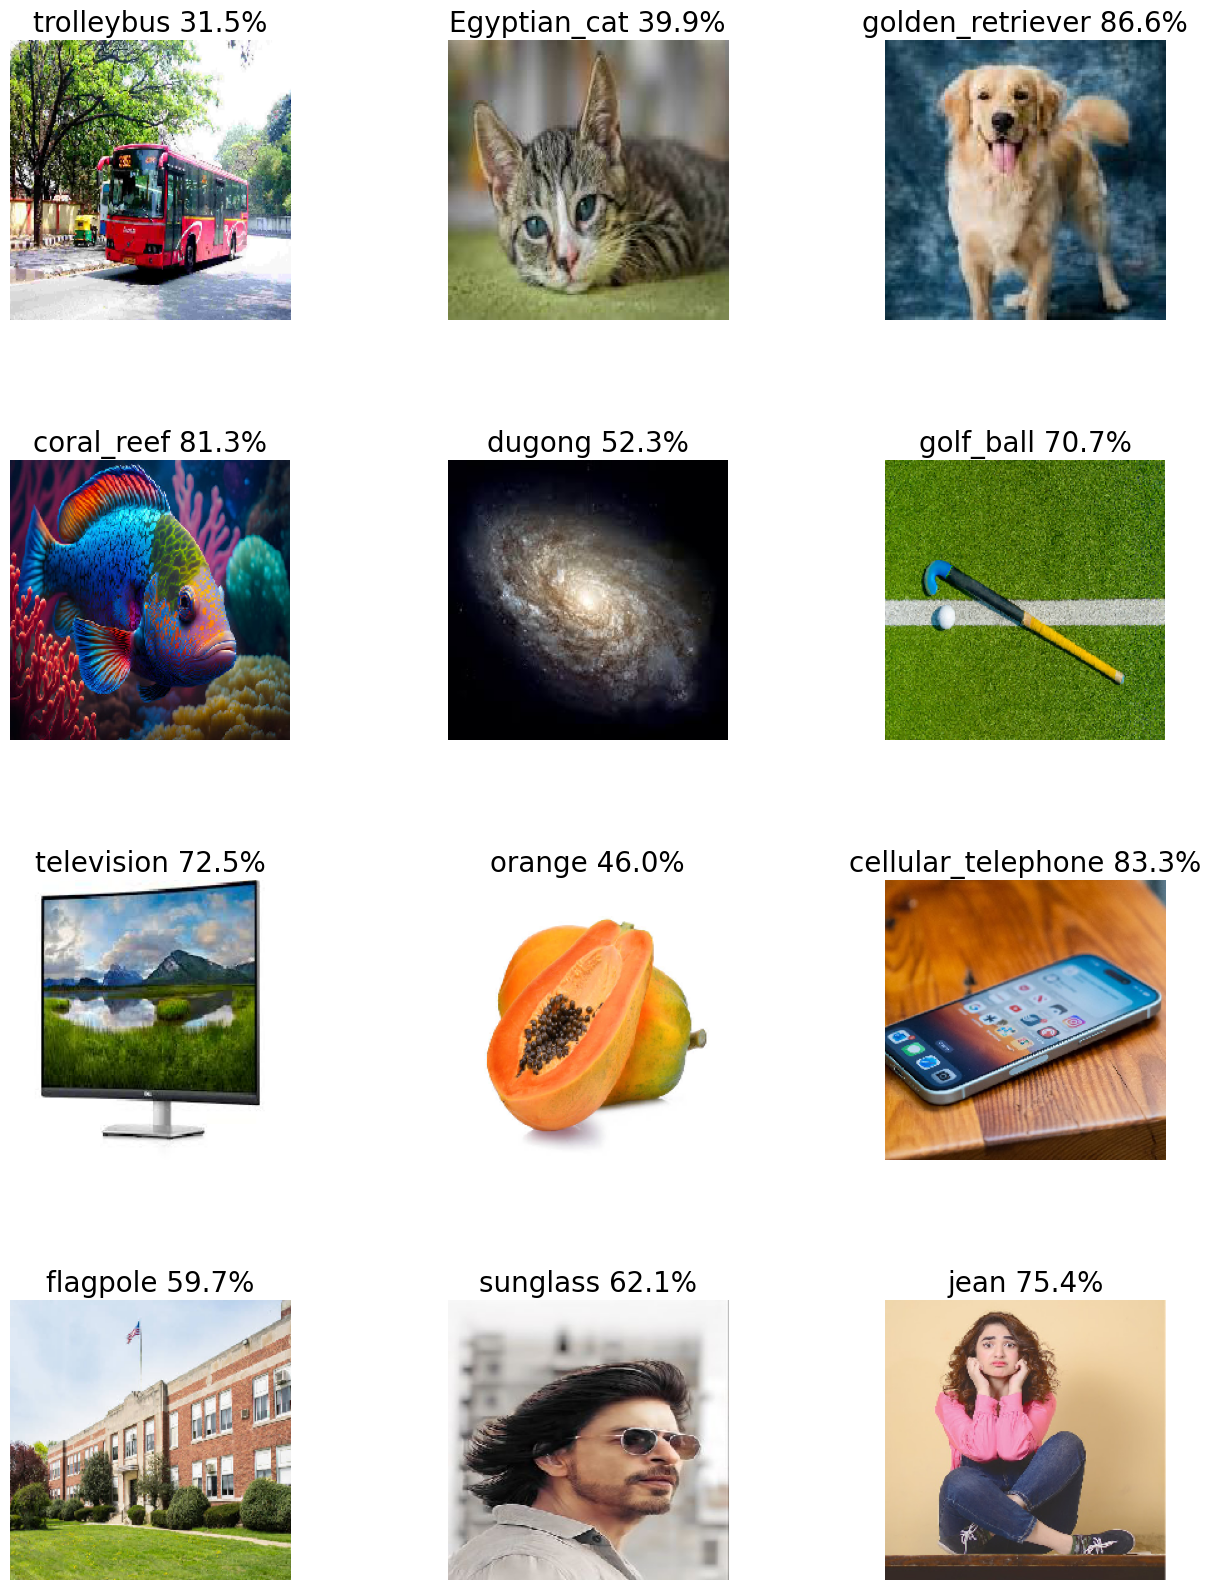

In [42]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

img_width, img_height = 224, 224
 
model_pretrained = ResNet50(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))


folder_path = 'C:/Users\Mohammed Riyaz/OneDrive - TestingXperts Private Limited/Pretrained_Model/Images/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(16,20))
i=0
rows=4
columns=3
 
for image1 in images:
    i+=1
    img = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
 
    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]
     
    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)
 
    plt.imshow(img)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
    plt.axis('off')
plt.show()
